In [2]:
import sys
sys.path.append("..")

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import examples.util as util
import dforest_class
import query

In [3]:
# Load full MNIST from OpenML
df_X, df_y = fetch_openml('mnist_784', return_X_y=True, version=1)

In [4]:
resized = []
for i in range(df_X.shape[0]):
    im = util.image_resize(df_X.iloc[i].values.reshape((28, 28)))
    resized.append(im.flatten())
data_X = np.array(resized)
data_y = np.array(df_y)
data_X = data_X // 16
print(data_X.shape)

# Shuffle and split data
train_X, train_y, test_X, test_y = util.split(data_X, data_y)
print(f"Training shape: {train_X.shape}")
print(f"Testing shape: {test_X.shape}")

(70000, 196)
Training shape: (56000, 196)
Testing shape: (14000, 196)


In [20]:
rf_model = RandomForestClassifier(max_features=0.04)
rf_model.fit(train_X, train_y)

RandomForestClassifier(max_features=0.04)

In [ ]:
rf_model = RandomForestClassifier(max_features=0.2)
rf2_model = RandomForestClassifier(max_features=0.2, max_depth=15)
bag_model = RandomForestClassifier()
bag2_model = RandomForestClassifier(max_depth=15)
gb_model = GradientBoostingClassifier(max_depth=8)
gb2_model = GradientBoostingClassifier(max_depth=5)

rf_model.fit(train_X, train_y)
rf2_model.fit(train_X, train_y)
bag_model.fit(train_X, train_y)
bag2_model.fit(train_X, train_y)
gb_model.fit(train_X, train_y)
gb2_model.fit(train_X, train_y)

KeyboardInterrupt: 

In [ ]:
# Eval models
_ = util.eval_multiclass_model(rf_model, train_X, train_y, test_X, test_y, "Random Forest")
_ = util.eval_multiclass_model(rf2_model, train_X, train_y, test_X, test_y, "Random Forest (Max Depth = 15)")
_ = util.eval_multiclass_model(bag_model, train_X, train_y, test_X, test_y, "Bagging")
_ = util.eval_multiclass_model(bag2_model, train_X, train_y, test_X, test_y, "Bagging (Max Depth = 15)")
_ = util.eval_multiclass_model(gb_model, train_X, train_y, test_X, test_y, "Gradient Boosting (Max Depth = 8)")
_ = util.eval_multiclass_model(gb2_model, train_X, train_y, test_X, test_y, "Gradient Boosting (Max Depth = 5)")

Random Forest - Train Accuracy: 1.0
Random Forest - Test Accuracy: 0.9690714285714286

Random Forest (Max Depth = 20) - Train Accuracy: 0.9941428571428571
Random Forest (Max Depth = 20) - Test Accuracy: 0.9631428571428572

Bagging - Train Accuracy: 1.0
Bagging - Test Accuracy: 0.9677142857142857

Bagging (Max Depth = 20) - Train Accuracy: 0.9944464285714286
Bagging (Max Depth = 20) - Test Accuracy: 0.9621428571428572

Gradient Boosting (Max Depth = 12) - Train Accuracy: 1.0
Gradient Boosting (Max Depth = 12) - Test Accuracy: 0.9732857142857143

Gradient Boosting (Max Depth = 8) - Train Accuracy: 0.9950535714285714
Gradient Boosting (Max Depth = 8) - Test Accuracy: 0.9691428571428572



In [22]:
rf = dforest_class.make_forest_classifier_sklearn(rf_model)

In [ ]:
rf = dforest_class.make_forest_classifier_sklearn(rf_model)
rf2 = dforest_class.make_forest_classifier_sklearn(rf2_model)
bag = dforest_class.make_forest_classifier_sklearn(bag_model)
bag2 = dforest_class.make_forest_classifier_sklearn(bag2_model)
gb = dforest_class.make_forest_classifier_sklearn(gb_model, gb=True)
gb2 = dforest_class.make_forest_classifier_sklearn(gb2_model, gb=True)

In [60]:
rf.print_summary()
rf2.print_summary()

# classes: 10
Size of forests: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Average Tree Size: 3949.35
Avg Max Depth: 35.41
Class 0:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 1:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 2:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 3:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 4:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 5:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 6:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 7:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 8:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 9:
Minimum: [0.0, None]
Maximum: [None, 1.0]
# classes: 10
Size of forests: [100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
Average Tree Size: 2944.81
Avg Max Depth: 15.0
Class 0:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 1:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 2:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 3:
Minimum: [0.0, None]
Maximum: [None, 1.0]
Class 4:
Minimum: [0.0, Non

In [ ]:
n_trials = 25
kwargs = {"pso_max_iters": 5, "merge_limit": 15}
clip_min = 0
clip_max = 16
delta = np.ones(14 * 14)
rf_res, cexs = query.multiclass_rob_query_many(rf, test_X[0:n_trials], delta, clip_min, clip_max, **kwargs)

print(f"True: {len(rf_res[0])}")
print(f"False: {len(rf_res[1])}")
print(f"None: {len(rf_res[2])}")

True: 2
False: 18
None: 5


In [11]:
import matplotlib.pyplot as plt

[[0.   0.98 0.   0.   0.   0.01 0.01 0.   0.   0.  ]
 [0.05 0.04 0.28 0.05 0.09 0.07 0.25 0.02 0.15 0.  ]
 [0.01 0.07 0.79 0.02 0.01 0.   0.02 0.   0.07 0.01]]
['1']
['2']
['2']


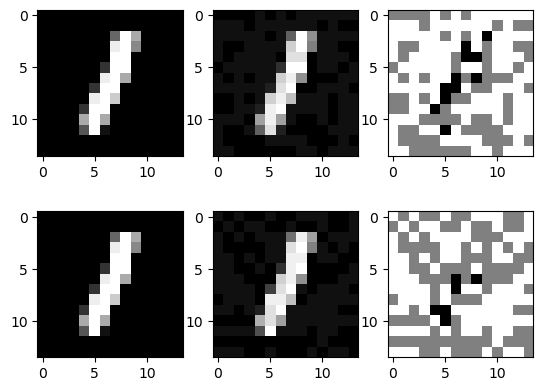

In [ ]:
i = 1
cexs[i] = cexs[i].round()

label_class = rf.eval(cexs[i], True).argmax()
min_bound = np.clip(rf_res[1][i] - delta, 0, 16)
max_bound = np.clip(rf_res[1][i] + delta, 0, 16)

best_cex, _ = query.pso_one_class(rf, label_class, min_bound, max_bound, N=40_000, max_iters=10)
best_cex = best_cex.round()

print(rf_model.predict_proba([rf_res[1][i], cexs[i], best_cex]))
print(rf.eval(rf_res[1][i]))
print(rf.eval(cexs[i]))
print(rf.eval(best_cex))

fig, ax = plt.subplots(2, 3)
ax[0][0].imshow(rf_res[1][i].reshape((14, 14)), cmap="gray")
ax[0][1].imshow(cexs[i].reshape((14, 14)), cmap="gray")
ax[0][2].imshow((cexs[i] - rf_res[1][i]).reshape((14, 14)), cmap="gray")
ax[1][0].imshow(rf_res[1][i].reshape((14, 14)), cmap="gray")
ax[1][1].imshow(best_cex.reshape((14, 14)), cmap="gray")
ax[1][2].imshow((best_cex - rf_res[1][i]).reshape((14, 14)), cmap="gray")

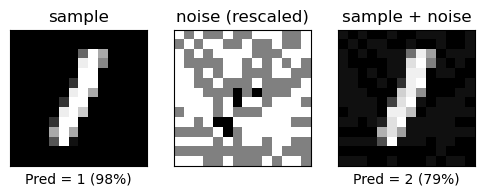

In [131]:
fig, ax = plt.subplots(1, 3, figsize=(6, 3))
ax[0].imshow(rf_res[1][i].reshape((14, 14)), cmap="gray")
ax[0].set_title("sample")
ax[0].set_xlabel("Pred = 1 (98%)")
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow((best_cex - rf_res[1][i]).reshape((14, 14)), cmap="gray")
ax[1].set_title("noise (rescaled)")
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].imshow(best_cex.reshape((14, 14)), cmap="gray")
ax[2].set_title("sample + noise")
ax[2].set_xlabel("Pred = 2 (79%)")
ax[2].set_xticks([])
ax[2].set_yticks([])
fig.savefig("images/noisy_1.png")

[[0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]
 [0.08 0.03 0.17 0.13 0.13 0.08 0.09 0.03 0.12 0.14]
 [0.02 0.03 0.52 0.08 0.04 0.06 0.01 0.13 0.04 0.07]]
['7']
['2']
['2']


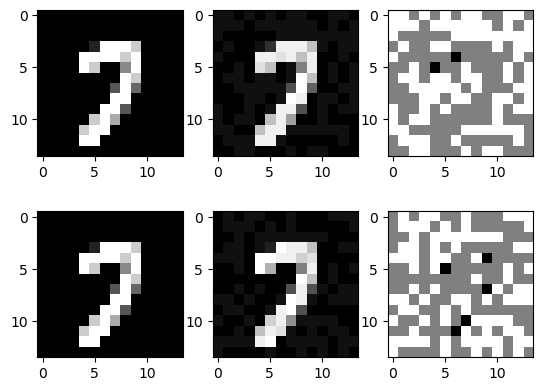

In [133]:
# 12, 13
i = 13
cexs[i] = cexs[i].round()

label_class = rf.eval(cexs[i], True).argmax()
min_bound = np.clip(rf_res[1][i] - delta, 0, 16)
max_bound = np.clip(rf_res[1][i] + delta, 0, 16)

best_cex, _ = query.pso_one_class(rf, label_class, min_bound, max_bound, N=40000, max_iters=10, swarm_inf=0.8, part_inf=0.8)
best_cex = best_cex.round()

print(rf_model.predict_proba([rf_res[1][i], cexs[i], best_cex]))
print(rf.eval(rf_res[1][i]))
print(rf.eval(cexs[i]))
print(rf.eval(best_cex))

fig, ax = plt.subplots(2, 3)
ax[0][0].imshow(rf_res[1][i].reshape((14, 14)), cmap="gray")
ax[0][1].imshow(cexs[i].reshape((14, 14)), cmap="gray")
ax[0][2].imshow((cexs[i] - rf_res[1][i]).reshape((14, 14)), cmap="gray")
ax[1][0].imshow(rf_res[1][i].reshape((14, 14)), cmap="gray")
ax[1][1].imshow(best_cex.reshape((14, 14)), cmap="gray")
ax[1][2].imshow((best_cex - rf_res[1][i]).reshape((14, 14)), cmap="gray")

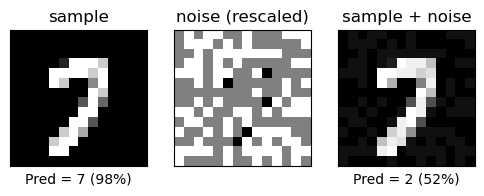

In [134]:
fig, ax = plt.subplots(1, 3, figsize=(6, 3))
ax[0].imshow(rf_res[1][i].reshape((14, 14)), cmap="gray")
ax[0].set_title("sample")
ax[0].set_xlabel("Pred = 7 (98%)")
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow((best_cex - rf_res[1][i]).reshape((14, 14)), cmap="gray")
ax[1].set_title("noise (rescaled)")
ax[1].set_xticks([])
ax[1].set_yticks([])
ax[2].imshow(best_cex.reshape((14, 14)), cmap="gray")
ax[2].set_title("sample + noise")
ax[2].set_xlabel("Pred = 2 (52%)")
ax[2].set_xticks([])
ax[2].set_yticks([])
fig.savefig("images/noisy_7.png")

[ 77 118  63  78  76 117  90  64 131  91  79 104  75  89 132  62  65 103
  50  49  61  92 119  88  93  51 107  48 120 116 102 133  74 134 105 161
 146  47 121 147 145 130 148 106 160 162 135 159  36  66  35  80 144  60
  52  34 149 158  37  94 108  46 174 101 115 122 175  33  87 163 173 129
 136 143  73  67 150  38 157  59  53 176  81 172  45 109  95  32 123 164
 137 142 128 177 114 151 100  39  22  21  72 171  54  86  68 156  58  20
  23  31  44 165 124  82 178 138 110 188  19 189  96  24 187  40 190 170
 152 127 186 141  18  25  30 191 179 113  57 155  71 166  85  99 185  69
  55  43 192  83  17 125  41  26  97 180 169 184 111 139 193   5  29   6
  16   7   8 153  56 167   4   9  10 140  70 126  15  11 112  84  98  42
  27   3 154 183 194 181 195 168 182  28  12  14  13   2   1   0]


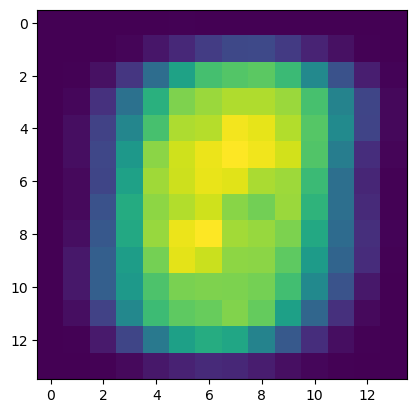

In [28]:
importances = np.array(rf.feature_importance(0))

print(np.flip(importances.sum(axis=0).argsort()))
plt.imshow(importances.sum(axis=0).reshape(14, 14))

In [29]:
array = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
array2 = np.array([7, 8, 9])
np.vstack([array, array2])

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])